In [ ]:
#Dharvi Mittal
#E20CSE018

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data from provided dir
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student-mat.csv",delimiter =";")

In [ ]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term
data.insert(0,'intercept',1,True)

In [ ]:
# Print the dataframe rows
data.head()

,intercept,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,1,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,1,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,1,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.iloc[40:55,:]

,intercept,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,1,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
41,1,GP,M,15,U,LE3,T,4,4,teacher,other,home,other,1,1,0,no,yes,no,no,no,yes,yes,yes,5,4,3,2,4,5,8,12,12,12
42,1,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18
43,1,GP,M,15,U,GT3,T,2,2,services,services,course,father,1,1,0,yes,yes,no,no,yes,yes,yes,no,5,4,1,1,1,1,0,8,8,11
44,1,GP,F,16,U,LE3,T,2,2,other,at_home,course,father,2,2,1,yes,no,no,yes,yes,yes,yes,no,4,3,3,2,2,5,14,10,10,9
45,1,GP,F,15,U,LE3,A,4,3,other,other,course,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,yes,5,2,2,1,1,5,8,8,8,6
46,1,GP,F,16,U,LE3,A,3,3,other,services,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,2,3,5,1,4,3,12,11,12,11
47,1,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20
48,1,GP,M,15,U,GT3,T,4,2,teacher,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,3,2,2,5,2,15,15,14
49,1,GP,F,15,U,GT3,T,4,4,services,teacher,other,father,1,2,1,yes,yes,no,yes,no,yes,yes,no,4,4,4,1,1,3,2,7,7,7


In [ ]:
XY = data[['intercept','G2','G3']]

In [ ]:
XY.describe()

,intercept,G2,G3
count,395.0,395.000000,395.000000
mean,1.0,10.713924,10.415190
std,0.0,3.761505,4.581443
min,1.0,0.000000,0.000000
25%,1.0,9.000000,8.000000
50%,1.0,11.000000,11.000000
75%,1.0,13.000000,14.000000
max,1.0,19.000000,20.000000


In [ ]:
# Define X (input features) and y (output feature) 
X = XY[['intercept','G2']].values
y = XY['G3']

In [ ]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(395, 2)
y: Type-<class 'pandas.core.series.Series'>, Shape-(395,)


__Expected output__:<br><br>
X: Type-<class 'numpy.ndarray'>, Shape-(395,2)<br>
y: Type-<class 'numpy.ndarray'>, Shape-(395,)

Let us visualize the relationship between X and y

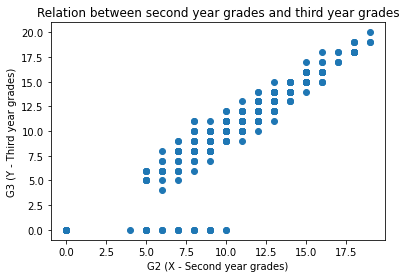

In [ ]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X[:,1],y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

##### Let us start implementing linear regression from scratch. Just follow code cells, see hints if required.

In [ ]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    y_pred = np.dot(X, weights)
    ### END CODE HERE ###
    
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [ ]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    loss = np.mean((y_true-y_pred)**2)/2
    ### END CODE HERE ###
    
    return loss

In [ ]:
def gradient(X, y_true, y_pred,weights):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    
    ### START CODE HERE ###
    
    grad[0] = np.mean((y_pred-y_true))
    grad[1] = np.mean((y_pred-y_true)*X[:,1])
    
    ### END CODE HERE ###
    
    return grad

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    # Initialize a list to record all the losses 
    losses  = []
    
    ### START CODE HERE ###
    for iter in range(max_iterations):
      y_pred = predict(X,weights)   
      loss = mean_squared_error(y,y_pred)
      losses.append(loss)
      grad = gradient(X,y,y_pred,weights)
      weights[0] = weights[0] - learning_rate*grad[0]
      weights[1] = weights[1] - learning_rate*grad[1] 
    ### END CODE HERE ###
    
    return weights, losses

##### Congratulations! You have implemented linear regression from scratch. Let's see this in action.

In [ ]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X, y, 0.01, 100)

In [ ]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 2.0542063373718342


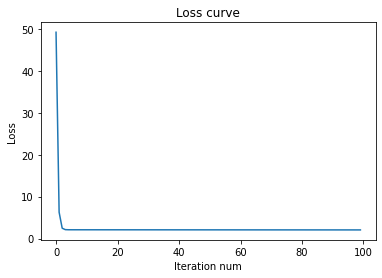

In [ ]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Make predictions using trained weights
y_pred = predict(X, optimal_weights)

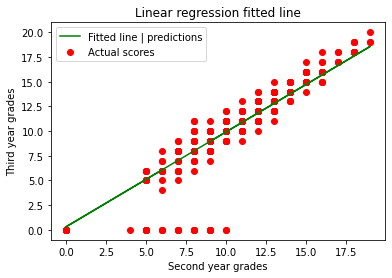

In [ ]:
# Visualize the results by plotting it
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()